### SDV - Credit Card Fraud Detection

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [2]:
#! pip install sdv

In [3]:
#! pip install pomegranate

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
from sdv import load_demo
from sdv import SDV

In [2]:
data = pd.read_csv('input/creditcard.csv')
data.head(3)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


0    284315
1       492
Name: Class, dtype: int64

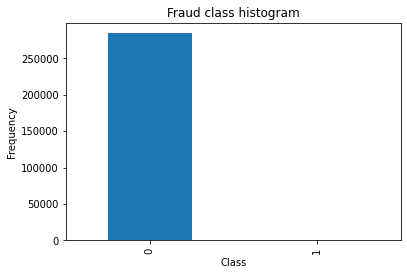

In [4]:
pd.value_counts(data['Class']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
data['Class'].value_counts()

In [5]:
from sdv.tabular import GaussianCopula

In [6]:
model1 = GaussianCopula()

In [7]:
model1.fit(data[data['Class']==1])

In [8]:
new_data1 = model1.sample(num_rows=280000)

In [9]:
new_data1.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,145681.0,0.749348,-2.722856,0.421988,2.315134,3.372381,0.083219,5.195509,-5.152509,0.753658,...,3.687608,-0.677592,1.397005,0.603125,-0.730596,0.494276,-0.557805,0.595675,710.09,1
1,74673.0,1.630826,-0.036304,-0.704765,5.298004,4.010276,-1.073881,1.353585,-1.022430,-4.361163,...,-1.796681,1.011564,0.354914,-0.783496,-0.144177,0.580683,0.074135,0.996721,239.93,1
2,69004.0,-11.210255,4.605648,-5.806341,4.849612,-8.264527,1.607593,-17.080034,-13.353700,-5.459629,...,-0.523458,1.883925,4.493074,0.462337,-0.267231,0.070006,0.716031,0.222005,476.54,1


In [10]:
new_data1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,...,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.0
mean,83778.666811,-5.614939,3.630857,-7.164792,4.539699,-3.160093,-1.397442,-5.582297,0.564155,-2.580898,...,0.711164,0.013836,-0.040139,-0.105298,0.040802,0.051555,0.172199,0.075521,226.323274,1.0
std,47370.290697,5.806027,4.281481,6.946335,2.868825,5.361424,1.853510,7.185444,6.782772,2.496699,...,3.873152,1.495396,1.573623,0.514538,0.797022,0.470808,1.376652,0.545782,170.651501,0.0
min,409.000000,-30.530205,-8.401850,-31.101128,-1.313230,-22.101170,-6.406214,-41.947839,-30.392487,-13.390026,...,-15.805847,-6.738808,-7.324969,-2.027468,-3.525181,-1.152635,-5.928558,-1.868759,0.000000,1.0
25%,43793.000000,-9.047492,0.706317,-11.409609,2.402680,-6.791754,-2.671775,-10.213646,-4.019455,-4.271102,...,-1.891485,-0.996027,-1.102485,-0.454017,-0.496079,-0.276278,-0.761650,-0.294518,90.530000,1.0
50%,83106.000000,-4.434567,3.614683,-5.773298,4.449595,-3.117061,-1.410764,-4.706555,0.600133,-2.531200,...,0.713497,0.015063,-0.041665,-0.094642,0.048472,0.046667,0.221906,0.076928,191.200000,1.0
75%,123425.250000,-0.978513,6.526361,-1.560859,6.552382,0.530976,-0.144331,0.065104,5.201259,-0.822327,...,3.322075,1.023800,1.029301,0.259479,0.588556,0.370145,1.171501,0.446913,326.580000,1.0
max,170348.000000,2.132370,22.030625,2.250178,12.114528,11.094937,6.295162,5.802498,19.993399,3.352976,...,17.824193,7.289929,5.451031,1.091413,2.208188,2.292866,3.052346,1.776841,1343.050000,1.0


In [11]:
model0 = GaussianCopula()

In [12]:
model0.fit(data[data['Class']==0])

/opt/conda/lib/python3.7/site-packages/copulas/univariate/truncated_gaussian.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  a = (self.min - loc) / scale
/opt/conda/lib/python3.7/site-packages/copulas/univariate/truncated_gaussian.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  b = (self.max - loc) / scale


In [13]:
new_data0 = model0.sample(num_rows=280000)

In [14]:
new_data0.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,127402.0,0.169304,-0.927753,-0.819255,0.638648,-0.408943,-1.440666,0.232497,-2.213980,-0.194224,...,-1.189296,-0.442063,-0.382493,0.201283,-0.549024,0.240064,0.704270,-0.061185,406.82,0
1,171938.0,1.472089,0.924270,0.133070,1.033330,-0.652592,0.485465,-2.309721,-0.004998,-1.482569,...,-0.434272,-0.244475,0.544888,-0.252773,-1.419769,0.347679,0.890918,0.273056,128.97,0
2,63021.0,0.200579,0.352730,0.985166,0.584903,0.718195,-0.860691,-1.221910,-0.355573,-1.245341,...,-0.638664,-0.057989,0.378014,-0.364695,0.798311,-0.209118,-0.021514,0.257285,63.16,0


In [15]:
new_data0.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,...,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.000000,280000.0
mean,94831.038943,-0.035536,-0.009804,0.015322,-0.012282,0.001897,0.001444,0.007141,-0.003865,0.003809,...,-0.000537,0.001852,-0.000540,0.001057,0.000006,-0.002085,0.000772,-0.000081,212.028222,0.0
std,46733.037692,1.882919,1.637400,1.461622,1.398372,1.357999,1.324549,1.177582,1.161086,1.088620,...,0.715647,0.723461,0.621172,0.604433,0.521553,0.483006,0.399772,0.329382,160.296273,0.0
min,2.000000,-12.981018,-7.137261,-6.182245,-5.676797,-6.267394,-6.157000,-5.236189,-5.427196,-4.913035,...,-3.645561,-3.194456,-2.656288,-2.695389,-2.345633,-2.374209,-2.017463,-1.590080,0.000000,0.0
25%,57736.000000,-1.135740,-1.115585,-0.971947,-0.955390,-0.915156,-0.890638,-0.786519,-0.787666,-0.730019,...,-0.483915,-0.486192,-0.419883,-0.406308,-0.351761,-0.327376,-0.268499,-0.221876,84.720000,0.0
50%,97898.500000,0.348431,-0.011675,0.015030,-0.014077,0.003887,0.003281,0.004641,-0.003123,0.004980,...,-0.000842,0.001760,0.000381,0.001246,-0.000605,-0.000354,0.000696,-0.000024,178.800000,0.0
75%,134290.250000,1.462104,1.091341,1.002099,0.930058,0.917348,0.897272,0.804710,0.776665,0.739926,...,0.482410,0.488780,0.417600,0.407373,0.352832,0.324493,0.269946,0.221362,305.940000,0.0
max,172791.000000,2.454919,7.529698,7.164530,6.333081,6.159176,6.379381,5.276048,6.185619,5.194667,...,3.156967,3.131389,2.894899,2.923931,2.388240,2.010017,1.755477,1.563932,1162.700000,0.0


In [16]:
synthetic_data = new_data0.append(new_data1)

In [17]:
synthetic_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,560000.000000,560000.000000,560000.000000,560000.000000,560000.000000,560000.000000,560000.000000,560000.000000,560000.000000,560000.000000,...,560000.000000,560000.000000,560000.000000,560000.000000,560000.000000,560000.000000,560000.000000,560000.000000,560000.000000,560000.0
mean,89304.852877,-2.825238,1.810526,-3.574735,2.263709,-1.579098,-0.697999,-2.787578,0.280145,-1.288544,...,0.355314,0.007844,-0.020339,-0.052120,0.020404,0.024735,0.086486,0.037720,219.175748,0.5
std,47376.106422,5.139074,3.717481,6.171097,3.205142,4.218298,1.756184,5.858248,4.874184,2.319369,...,2.807729,1.174664,1.196437,0.563801,0.673830,0.477699,1.017270,0.452343,165.708941,0.5
min,2.000000,-30.530205,-8.401850,-31.101128,-5.676797,-22.101170,-6.406214,-41.947839,-30.392487,-13.390026,...,-15.805847,-6.738808,-7.324969,-2.695389,-3.525181,-2.374209,-5.928558,-1.868759,0.000000,0.0
25%,50240.000000,-4.759878,-0.683499,-5.773822,-0.170237,-3.231524,-1.812314,-4.707589,-1.395642,-2.588951,...,-0.751363,-0.669815,-0.645233,-0.431889,-0.411575,-0.301826,-0.390095,-0.250247,87.490000,0.0
50%,90670.000000,-1.080351,0.986159,-1.112487,1.418272,-0.623281,-0.583533,-0.652640,0.084212,-0.758239,...,0.110954,0.006026,-0.011559,-0.049415,0.018698,0.023163,0.048010,0.029292,184.930000,0.5
75%,129332.250000,0.837684,3.730776,0.453301,4.454732,0.842739,0.521428,0.690676,1.740836,0.349041,...,1.186973,0.684941,0.615483,0.330557,0.452401,0.347949,0.541289,0.314931,316.020000,1.0
max,172791.000000,2.454919,22.030625,7.164530,12.114528,11.094937,6.379381,5.802498,19.993399,5.194667,...,17.824193,7.289929,5.451031,2.923931,2.388240,2.292866,3.052346,1.776841,1343.050000,1.0


0    280000
1    280000
Name: Class, dtype: int64

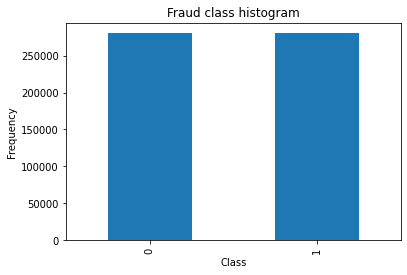

In [18]:
pd.value_counts(synthetic_data['Class']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
synthetic_data['Class'].value_counts()

In [19]:
#https://sdv.dev/SDV/user_guides/single_table/tabular_preset.html

## Statistical Metrics

In [20]:
from sdv.metrics.tabular import CSTest, KSTest

This metric uses the Chi-Squared test to compare the distributions of two discrete columns. The output for each column is the CSTest p-value, which indicates the probability of the two columns having been sampled from the same distribution.

In [36]:
#CSTest.compute(data, synthetic_data)

This metric uses the two-sample Kolmogorov–Smirnov test to compare the distributions of continuous columns using the empirical CDF. The output for each column is 1 minus the KS Test D statistic, which indicates the maximum distance between the expected CDF and the observed CDF values.

In [22]:
KSTest.compute(data, synthetic_data)

0.7201266103697778

In [23]:
from sdv.evaluation import evaluate

In [24]:
#evaluate(synthetic_data, data, metrics=['CSTest', 'KSTest'], aggregate=False)

In [ ]:
evaluate(synthetic_data, data)

## Likelihood Metrics

In [24]:
from sdv.metrics.tabular import BNLikelihood, BNLogLikelihood, GMLogLikelihood

This metric fits a BayesianNetwork to the real data and then evaluates the average likelihood of the rows from the synthetic data on it.

In [132]:
#BNLikelihood.compute(data.fillna(0), synthetic_data.fillna(0))

This metric fits a BayesianNetwork to the real data and then evaluates the average log likelihood of the rows from the synthetic data on it.

In [133]:
#BNLogLikelihood.compute(data.fillna(0), synthetic_data.fillna(0))

This metric fits multiple GaussianMixture models to the real data and then evaluates the average log likelihood of the synthetic data on them.

In [134]:
#GMLogLikelihood.compute(data.fillna(0), synthetic_data.fillna(0))

## Detection Metrics

The metrics of this family evaluate how hard it is to distinguish the synthetic data from the real data by using a Machine Learning model. To do this, the metrics will shuffle the real data and synthetic data together with flags indicating whether the data is real or synthetic, and then cross validate a Machine Learning model that tries to predict this flag. The output of the metrics will be the 1 minus the average ROC AUC score across all the cross validation splits.

In [25]:
from sdv.metrics.tabular import LogisticDetection, SVCDetection

In [26]:
LogisticDetection.compute(data, synthetic_data)

0.13669614456979373

## Machine Learning Efficacy Metrics

This family of metrics will evaluate whether it is possible to replace the real data with synthetic data in order to solve a Machine Learning Problem by learning a Machine Learning model on the synthetic data and then evaluating the score which it obtains when evaluated on the real data.

In [33]:
from sdv.metrics.tabular import BinaryLogisticRegression

In [34]:
BinaryLogisticRegression.compute(data, synthetic_data, target='Class')

0.09547097597278333

## Privacy Metrics

In [29]:
from sdv.metrics.tabular import NumericalLR

In [31]:
NumericalLR.compute(data,synthetic_data,key_fields=['V7', 'V8', 'V9'],sensitive_fields=['Amount'])

/opt/conda/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


0.25449321617094484